### Basilar membrane

Small structures respond better to higher frequencies than do large structures (compare, for example, the sizes of a violin and a double bass or the strings at the treble and bass ends of a piano). 

The basilar membrane therefore responds best to high frequencies where it is narrow and thin (at the base) and to low frequencies where it is wide and thick (at the apex). Since its thickness and width change gradually along its length,  pure tones at different frequencies will produce movement at different positions or “places” along its length.

In [7]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/6/65/Uncoiled_cochlea_with_basilar_membrane.png',width=600)

here's a better image showing the basilar membrane width along the cochlea:

In [8]:
Image(url='http://what-when-how.com/wp-content/uploads/2012/04/tmp15F72_thumb2.jpg')

### Critical Bands

Critical bands are regions of the basilar membrane that can be thought of as selective filters, where tiny hairs reverberate or react only to specific frequency bands. These bands are called **critical bands**.

The physical size of a critical band is more-or less stable across the cochlea at approximately 1.2 millimeters per band. 

However, because our perception of pitch is not linear but logarithmic, the range of frequencies for each band (the size or **bandwidth** of the critical band) varies as a function of frequency. E.g., 

* 100 Hz wide for a 200-Hz sound, 
* ~900 Hz wide for a 5000-Hz sound. 

(See the powerpoint slide #22 from Lesson 12.)

Importantly, the discovery of the critical bands was made by a Psychoacoustician, Harvey Fletcher in the 1940s as he realized the relation of tone masking as a function of frequency and intensity. Thus, a second tone within the same critical band will interfere with the perception of the first tone by auditory masking. 

These 24 bands are referred to as the Bark scale.

Therefore, two pure tones are only perceived as separate pure tones when their frequency difference is greater than the critical bandwidth. Otherwise they are perceived as a single fused tone that is “rough” or as beats depending on the frequency difference between the two pure tones.

*demo

"Importantly, the critical bands have a certain width, but their position on the frequency scale is not fixed; rather, the position can be changed continuously, perhaps by the ear itself." -Zwicker, 1961

Thus the important attribute of the Bark scale is the width of the critical band at any given frequency, not the exact values of the edges or centers of any band.

The general formula for calculating the size of the critical bandwidth around a centre frequency can be approximated by:

$BW_c = 25 + 75(1+1.4(f/1000)^2)^.69$

In [3]:
# In code form:
import math
f=315
bw = 25+ 75*(math.pow(1+(1.4*(f/1000)**2),0.69))
bw

107.04276136144469

## File compression

There are two types of compression: *Lossless* and *Lossy*. 
in *Lossy* compression, aspects of the original file are genuinely thrown away and cannot be reconstructed. 

Common lossy file types include: MP3, WMA, and OGG. 

*Lossless* compression, on the other hand, provides a kind of code or shortcut for storing data. Typically, it is a short term "container" for temporarily reducing file size for transmission purposes, much like a zip file. 

Lossless compression typically takes advantage of unnecessary stored metadata, and finds ways to "package" silence. 
For example, this type of code might say there are 500 zeros in a row, instead of physically storing all those zeros. The most common type of lossless file is FLAC (stands for Free Lossless Audio Codec).

Importantly, Lossless compression does not compress the actual music, or delete any musical data. 

The uncompressed sound stored on a CD contains 16 bits of information for every sample *per* channel! 

So assuming two channels, and a sample rate of 44,100 that's 44100 * 16 * 2 = 1,411,200 bits or ~1411 Kbits of data per second. The amount of data per second is known as the **bit rate.**

Computers used to be a lot slower and had less space. So in order to store it or transfer over internet, audio files needed to get smaller. So different mathematical algorithms appeared for compressing files. Depending on the method, it was translated into something called a **codec**. 

Codec stands for "**co**der/**dec**oder" (or, if you like, **co**mpression/**dec**ompression)

A full quality uncompressed file like a .wav file would have a codec applied and result in a smaller file, like an MP3.

MP3s for example, at highest quality have a bit rate of approximately 320 Kbits/s -- a more than four-fold reduction in data size. 

Note, however, that in perceptual experiments, stereo mp3s with high bitrates (256 kbps and higher) commonly are not distinguished from FLAC in terms of sound quality! Why would this be the case?!

OK, so what are some ways we could reduce the amount of information in the original file?

1) Adjust sample rate. In order to scale back the size of the information per second, we would have to cut the sample rate by an order of around four. 

However, cutting sample rate we run into a host of problems, especially if we cut it by that much. (We'll return later to topic of downsampling and oversampling.) 

2) Reduce the bit depth. However, even reducing the bit depth to 8 would only get us to about 705 Kbits/s. So, what other options are there for reducing information?

Recall our hearing range charts. Not many people can hear below around 50-60Hz and our hearing drops sharply above 15-16KHz, so one compression method simply eliminates any stored information that falls below 50Hz and above 15Khz, for example.

Most compression formats use psychoacoustic models to determine which aspects of a sound we are unlikely to hear (for any number of reasons) and *throw away that information* in order to save space and/or transmission time. 

While frequency content that falls outside the hearing range may be obvious, what about information that *does* fall inside the hearing range? Wouldn't most of a music signal's content include this data? 

3) Option 3: remove redundant data from the signal

## Masking

The major part of data reduction provided by perceptual audio codecs can be attributed to the extensive exploitation of the properties of perception, and trying to reduce data which is irrelevent to our auditory perceptual systems, for which **psychoacoustic models of human auditory perception** are key.

Specifically, masked content plays a huge role in the development of lossy compression algorithms. There are two types of masking: simultaneous masking and temporal masking.

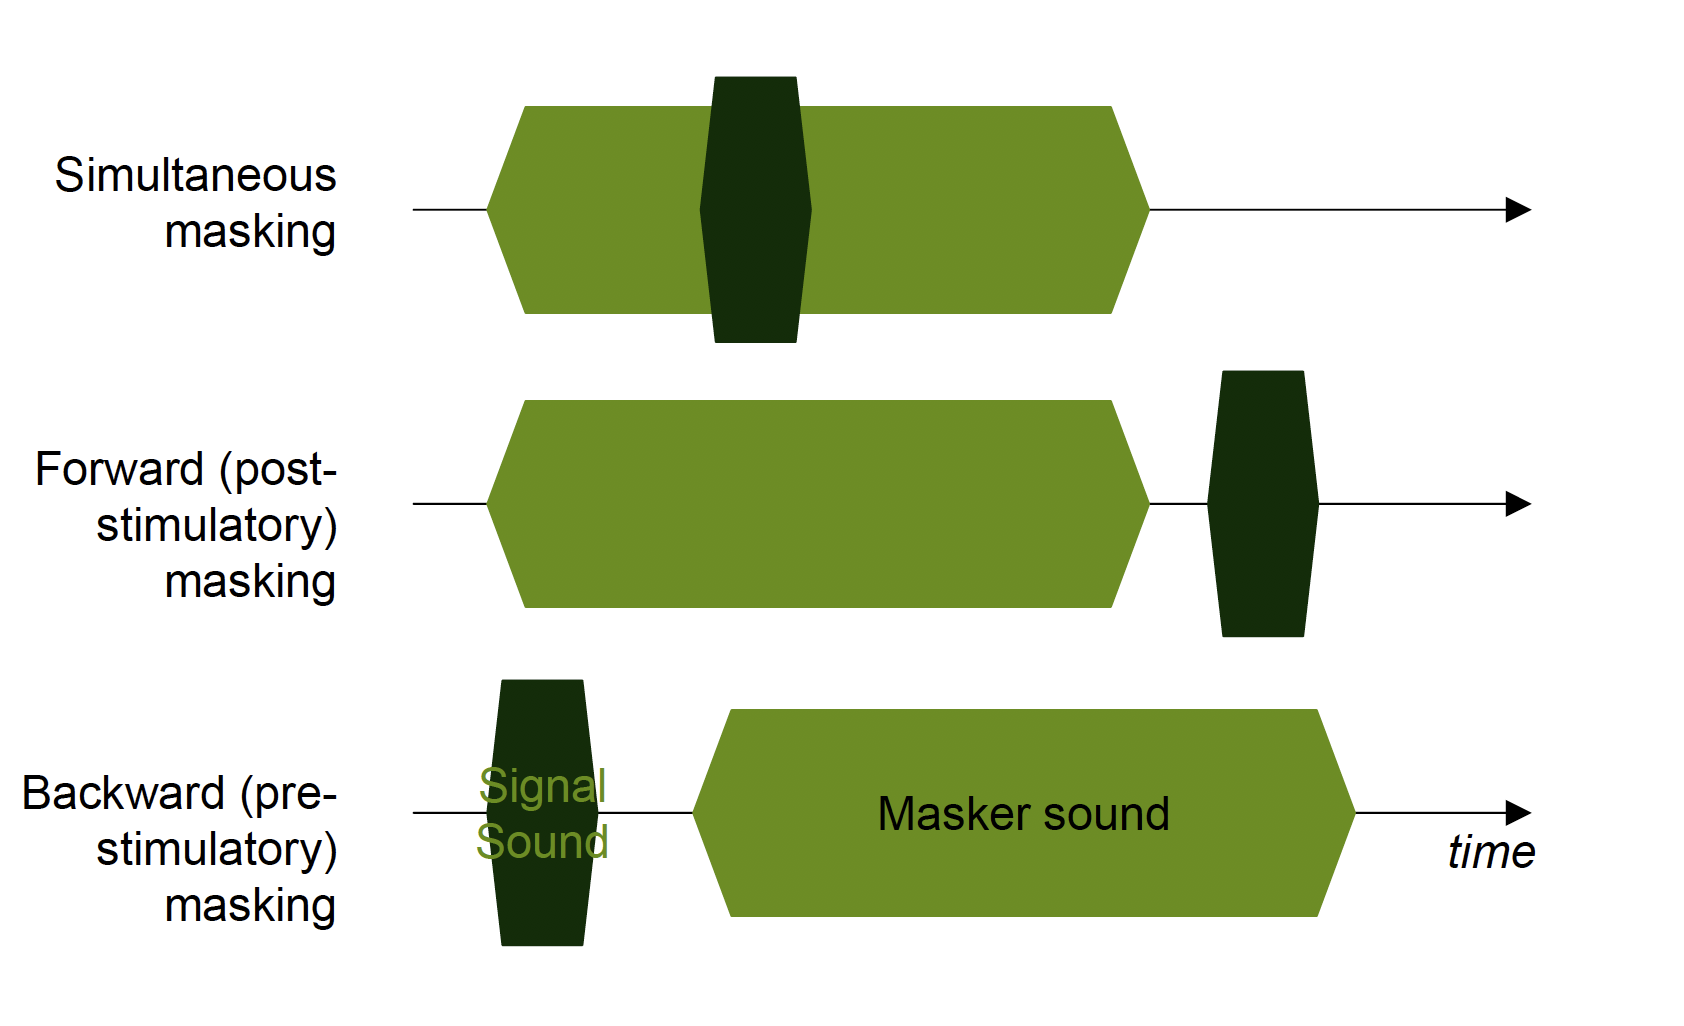

In [3]:
from IPython.display import Image
Image('../images/typesOfMasking.png', width=600)

#### Simultaneous Masking

Simlutaneous masking (or "spectral masking") 

Dashed line represents threshold of hearing in quiet, solid line illustrates the masking threshold due to the presence of a masker signal (e.g., narrow-band noise), due to which weaker signals at neighboring frequencies become inaudible. 

A **threshold of hearing** describes the minimum sound pressure level (SPL dB) of a sound to be perceivable in isolation and under extremely quiet conditions as a function of frequency. (This graph was shown in Lesson 5, "working with sound").

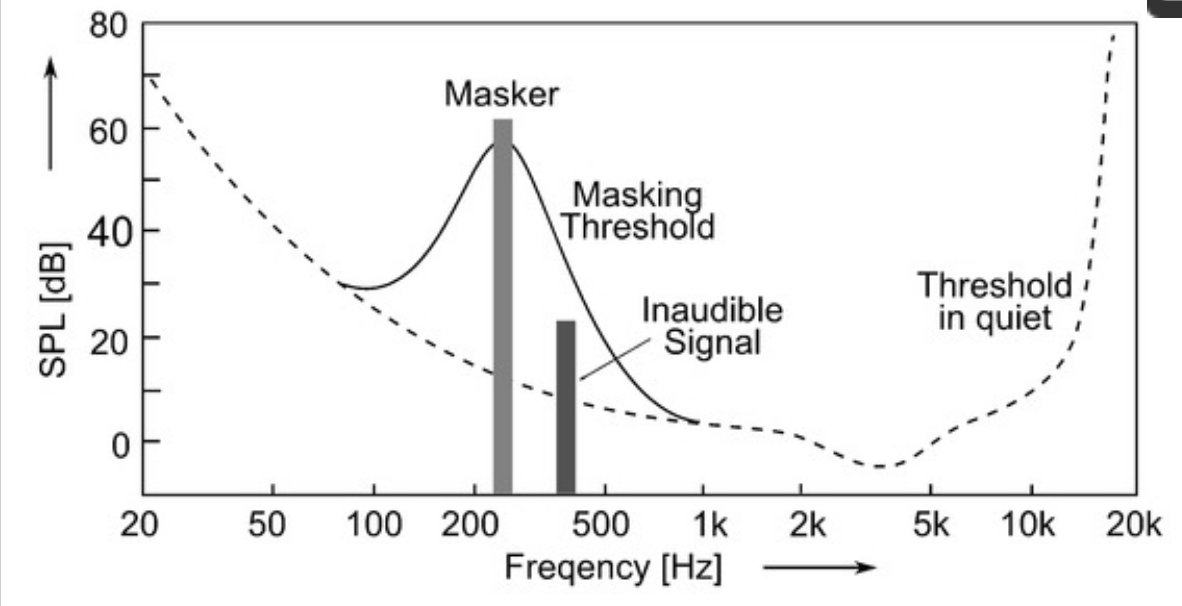

In [4]:
Image('../images/maskingThreshold.png', width=600)

In the presence of a masker and a target sound sounding simultaneously, the "threshold in quiet" curve changes into a **masking threshold**, which shows an asymmetrical bell-shaped increase in frequencies in the vicinity of the masker, depending on its frequency, level, and signal type. Any sound beneath this masking threshold will be masked by the louder signal, and thus inaudible for the average listener.

Masking effects are strongest for signals that are within the critical bandwidth of the masker. Within the critical bandwidth, the masking threshold remains constant. The masking effects can also spread to frequencies beyond the critical bandwidth (this is called "inter-band masking"). 

Depending on the type of masker, i.e., tone or noise, the strength of the masking effect varies. While noise-like maskers can mask tone-like signals very well (up to a masker-to-probe level ratio of about 6 dB), tone-like maskers can mask noise only to a much weaker extent (about 20 dB).

Note that a masker is much better able to mask a higher frequency target as the amplitude of the masker increases. This is known as **the upward spread of masking**. Notice the assymetry in the curves in the graph below as the amplitude increases.

Also of note is that, when plotted as a function of critical band (as opposed to frequency in Hz), the shapes of the masking patterns are very stable (except for possibly the lowest band). 

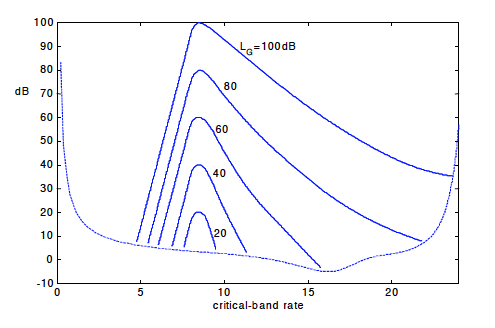

In [5]:
Image('../images/upwardSpreadMasking.png')

#### Temporal masking

Temporal masking arises when the masker and probe signals are not present at the same point in time. For “post-masking” or "forward masking", *quiet sounds* that occur after a *loud stimulus* are masked due largely to the reduced sensitivity of the ear for up to 200 ms following the offset of the masker. 

Several parameters determine temporal masking, including the time interval between the masker and signal, masker level, masker duration, and the acoustic similarity between the masker and the signal. Assuming all other parameters are held constant, temporal masking decreases rapidly as the time interval between the masker and the signal increases. 

There is also “pre-masking” or "backward masking" within a much shorter time window of only ~20 ms *before* the masker, where the perception of relatively soft target signals are masked by subsequent louder (masker) signals. 

This seemingly psychic behavior is assumed to be caused by the fact that louder signals are processed much more quickly than soft sounds (and/or attentional processing redirects focus to louder stimuli). 

#### Back to Codecs...

So, an audio signal can be analyzed in terms of a time-varying power spectrum in conjunction with these known masking thresholds across the critical bands to identify parts of the signal that would already be masked. This information is therefore redundant and can be elimitated without affecting the resulting end audio result.

But wait! Isn't a signal's complexity just measured in terms of sampling rate and bit depth?! ...

Yes! So...how does removing frequency content change the amount of information in the audio signal?

Here's a schematic of how an audio codec works:

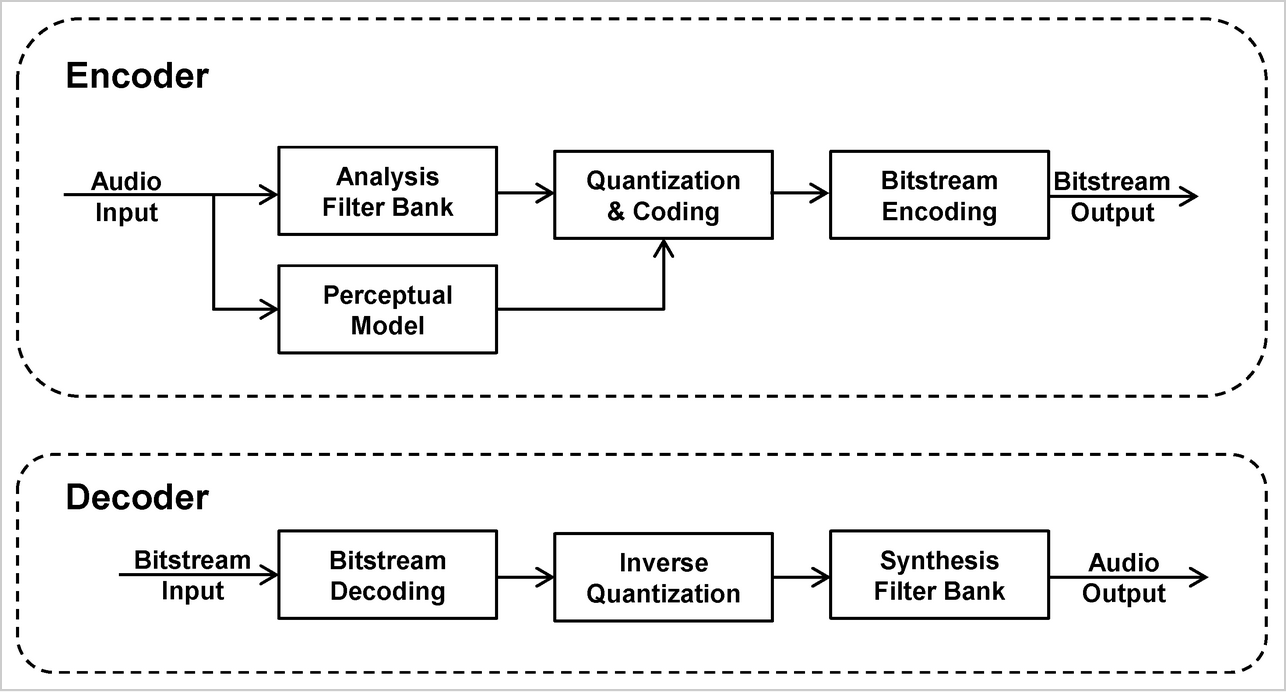

In [6]:
Image('../images/codec.png',width=600)

The spectral samples are eventually quantized (with algorithms to account for resulting distortion) and optionally entropy-coded to reduce the information to a compact representation, and then packed into a bitstream as binary values. 

So effectively what gets stored is the information necessary to "build" the sound from scratch.

The "decoder" part of the algorithm then essentially reconstructs the audio from the compressed bitstream.